In [13]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

In [14]:
# PREPROCESSING
df = pd.read_csv("data/prices-d.csv", index_col=0)
df.pop("Volume")
df.pop("Close")
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.pop("Open")
df.pop("High")
df.pop("Low")
df.head()

,Adj Close,Range
Date,,
2010-06-29,1.592667,0.392632
2010-06-30,1.588667,0.276076
2010-07-01,1.464000,0.226000
2010-07-02,1.280000,0.190870
2010-07-06,1.074000,0.208500


In [15]:
# II. Detrending Price (Capture Change)

In [16]:
'''
II.A: Absolute Change 

A data series may have trend, and it may have seasonality. Multi-year stock price data is less likely to show 
seasonality, but very likely to show a strong persistent trend. The problem with trended data (especially 
financial asset data which tends to grow exponentially) is that it smashes early data into oblivion, making 
it nearly invisible to the model trying to generalize something from it. This is why absolute price is 
almost never fed into a model without being heavily processed.

Now for the closing price ('Adj Close' column), again no one cares about the absolute price from day to day, 
what one cares about is the change in price from day to day. Pandas lets us acheive that with the following 
single line: 
'''
df['Abs Change'] = df["Adj Close"].diff()
df.head()

,Adj Close,Range,Abs Change
Date,,,
2010-06-29,1.592667,0.392632,NaN
2010-06-30,1.588667,0.276076,-0.004000
2010-07-01,1.464000,0.226000,-0.124667
2010-07-02,1.280000,0.190870,-0.184000
2010-07-06,1.074000,0.208500,-0.206000


<AxesSubplot:xlabel='Date'>

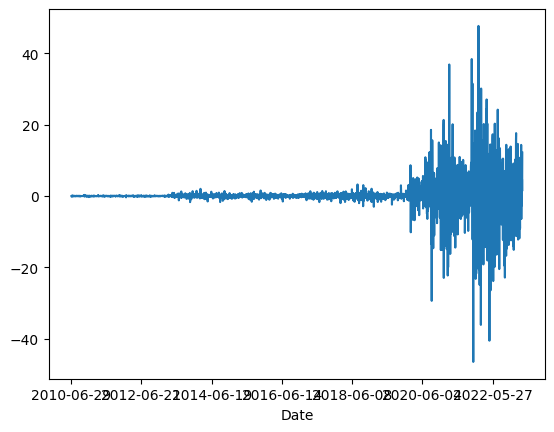

In [17]:
'''
II.A.1: Problem with Absolute Change

But the main problem is evident when we plot this over time. We can see that as the price rose over the years, the 
average daily change also increased, naturally. This is not ideal data to feed into a model, because 
(as you can see) earlier values will be de-emphasized to the point of nearly being ignored, whereas later 
data points will be overemphasized in relation. Since we would like the model to be able to glean meaningful 
data from the entire dataset, this is less than ideal. The plot below shows data that is likely to be 
difficult for a model to extract generalizations from. 
'''
df['Abs Change'].plot()

<AxesSubplot:xlabel='Date'>

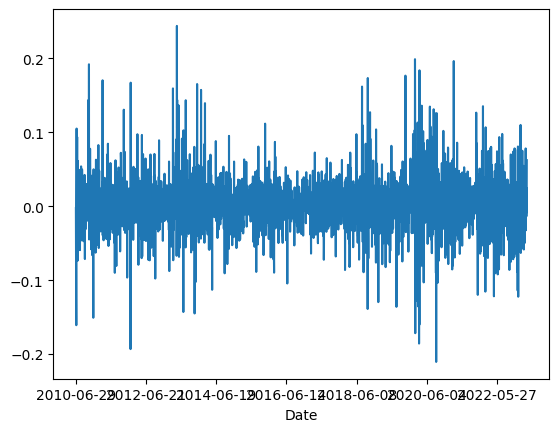

In [18]:
'''
II.B: Percentage Change

Instead, the percentage change is what we want. It's less likely to be skewed or trended, and we can see this visually
by plotting. 
'''
#first remove Abs Change, as we don't need it 
df.pop("Abs Change")

df['Change'] = df["Adj Close"].pct_change()
df['Change'].plot()

In [19]:
'''
II.B.1: NaN in first row 

Note that the very first value for the Pct Change column is a NaN. The reason is that to get this column, each 
value in the source column was compared to its previous timestep, and the first record has no previous to which 
to compare. 
'''
df.head()

,Adj Close,Range,Change
Date,,,
2010-06-29,1.592667,0.392632,NaN
2010-06-30,1.588667,0.276076,-0.002512
2010-07-01,1.464000,0.226000,-0.078473
2010-07-02,1.280000,0.190870,-0.125683
2010-07-06,1.074000,0.208500,-0.160937


In [20]:
'''
II.B.1.a: Remove the NaN

The NaN can be removed reasonably by either basing the first change off of the Open 
(instead of the previous step's Close), or just by simply removing the first row. I'll just remove the first row. 
'''
print('len before:', len(df))
df = df. tail(-1) 
print('len after:', len(df))
df.head()

len before: 3212
len after: 3211


,Adj Close,Range,Change
Date,,,
2010-06-30,1.588667,0.276076,-0.002512
2010-07-01,1.464000,0.226000,-0.078473
2010-07-02,1.280000,0.190870,-0.125683
2010-07-06,1.074000,0.208500,-0.160937
2010-07-07,1.053333,0.100610,-0.019243


In [21]:

adf = adfuller(df['Change'])

print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])

ADF Statistic: -56.772636
p-value: 0.000000
